In [3]:
import numpy as np
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

### Rotated Helper Experiments

In [10]:
angles = [0,45,90,180]
trials = 1

AUXMOM:

In [11]:
D = {}
for angle in angles:
    with open(f'results/MnistExp_angle{angle}.pkl', 'rb') as f:
        D[angle] = pickle.load(f)

1 0.8996
5 0.944
10 0.9645


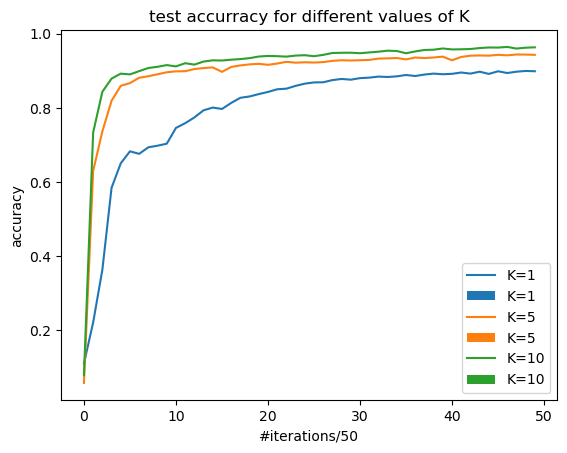

In [12]:
Res = D[angles[0]]
dic = {"train_loss":{},"test_acc":{}}
for type_ in dic:
    for k in Res:
        dic[type_][k] = np.zeros((trials,50))

for k in Res:
    for t in range(trials):
        for type_ in dic:
            dic[type_][k][t] = Res[k][t][type_]
tp = "test_acc"

for k in Res:
    arr = dic[tp][k]
    yfit = arr.mean(0)
    dyfit = arr.std(0)
    print(k,yfit.max())
    p = plt.plot(yfit,label="K="+str(k))
    plt.fill_between(np.arange(len(yfit)),yfit - dyfit, yfit + dyfit,label="K="+str(k))

plt.title("test accurracy for different values of K")
plt.xlabel("#iterations/50")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.savefig("images/TestACCK.pdf")

0 2.302616596221924
45 3.9708502292633057
90 13.89802074432373
180 5.084277629852295


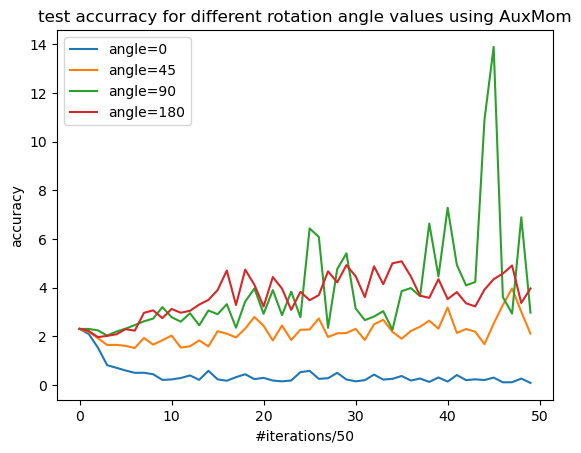

In [16]:
K = 5
tp = "train_loss"#"test_acc"
dic = {}
for angle in angles:
  dic[angle] = np.zeros((trials,50))
for angle in angles:
  for t in range(trials):
      dic[angle][t] = D[angle][K][t][tp]

for angle in dic:
  arr = dic[angle]
  if angle == 0:
    LAUXMOM = arr
  yfit = arr.mean(0)
  dyfit = arr.std(0)
  print(angle,yfit.max())
  p = plt.plot(yfit,label="angle="+str(angle))
  #plt.fill_between(np.arange(len(yfit)),yfit - dyfit, yfit + dyfit,label="angle="+str(angle))

plt.title("test accurracy for different rotation angle values using AuxMom")
plt.xlabel("#iterations/50")
plt.ylabel("accuracy")
plt.legend(loc="best")
#plt.savefig("images/TestAccAuxMom.pdf")

Naive Algorithm:

In [6]:
D = {}
for angle in angles:
  with open(f'results/MnistExpNaiveangle{angle}.pkl', 'rb') as f:
    D[angle] = pickle.load(f)

0 0.9612599999999999
45 0.90786
90 0.8918000000000001
180 0.8982699999999999


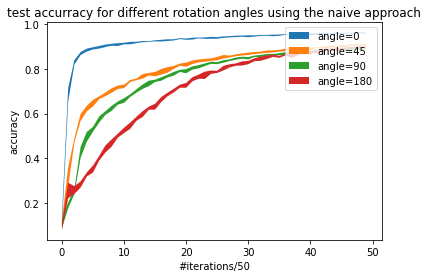

In [7]:
K = 10
tp = "test_acc"
dic = {}
for angle in angles:
  dic[angle] = np.zeros((trials,50))
for angle in angles:
  for t in range(trials):
      dic[angle][t] = D[angle][K][t][tp]

for angle in dic:
  arr = dic[angle]
  if angle == 0:
    LNaive = arr
  yfit = arr.mean(0)
  dyfit = arr.std(0)
  print(angle,yfit.max())
  #p = plt.plot(yfit,label="K="+str(k)),color=p[0].get_color(), alpha=0.2
  plt.fill_between(np.arange(len(yfit)),yfit - dyfit, yfit + dyfit,label="angle="+str(angle))

plt.title("test accurracy for different rotation angles using the naive approach")
plt.xlabel("#iterations/50")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.savefig("images/TestAccNaive.pdf")

### Mislabled Helper Experiments

In [8]:
ps = [0.2,0.5,0.8,1]

AUXMOM:

In [9]:
D = {}
for p in ps:
  with open(f'results/MnistExp_Labels{p}.pkl', 'rb') as f:
    D[p] = pickle.load(f)

0 0.96601
0.2 0.96621
0.5 0.9668599999999999
0.8 0.9668300000000001
1 0.96631


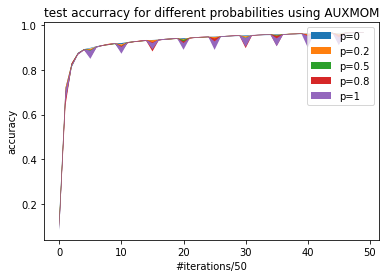

In [10]:
K = 10
tp = "test_acc"
dic = {}
for p in ps:
  dic[p] = np.zeros((trials,50))
for p in ps:
  for t in range(trials):
      dic[p][t] = D[p][p][t][tp]

for p in [0,0.2,0.5,0.8,1]:
  if p==0:
    arr = LAUXMOM
  else :
    arr = dic[p]
  yfit = arr.mean(0)
  dyfit = arr.std(0)
  print(p,yfit.max())
  #p = plt.plot(yfit,label="K="+str(k)),color=p[0].get_color(), alpha=0.2
  plt.fill_between(np.arange(len(yfit)),yfit - dyfit, yfit + dyfit,label="p="+str(p))

plt.title("test accurracy for different probabilities using AUXMOM")
plt.xlabel("#iterations/50")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.savefig("images/TestAccAUXMOMLABELS.pdf")

Naive Alg:

In [11]:
D = {}
for p in ps:
  with open(f'results/MnistExpNaive_Labels{p}.pkl', 'rb') as f:
    D[p] = pickle.load(f)

0 0.9612599999999999
0.2 0.9574600000000002
0.5 0.9423200000000002
0.8 0.90208
1 0.10792000000000002


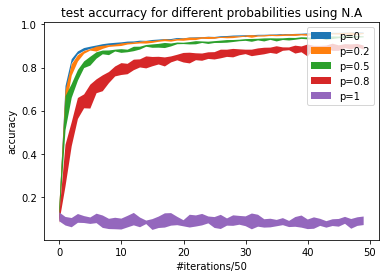

In [12]:
K = 10
tp = "test_acc"
dic = {}
for p in ps:
  dic[p] = np.zeros((trials,50))
for p in ps:
  for t in range(trials):
      dic[p][t] = D[p][p][t][tp]

for p in [0,0.2,0.5,0.8,1]:
  if p==0:
    arr = LNaive
  else :
    arr = dic[p]
  yfit = arr.mean(0)
  dyfit = arr.std(0)
  print(p,yfit.max())
  #p = plt.plot(yfit,label="K="+str(k)),color=p[0].get_color(), alpha=0.2
  plt.fill_between(np.arange(len(yfit)),yfit - dyfit, yfit + dyfit,label="p="+str(p))

plt.title("test accurracy for different probabilities using N.A")
plt.xlabel("#iterations/50")
plt.ylabel("accuracy")
plt.legend(loc="best")
plt.savefig("images/TestAccNAIVELABELS.pdf")